In [17]:
import ReferenceTemplate 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
class1=pd.read_csv('class1Train.csv').drop('Unnamed: 0',axis=1)
class2=pd.read_csv('class2Train.csv').drop('Unnamed: 0',axis=1)
class3=pd.read_csv('class3Train.csv').drop('Unnamed: 0',axis=1)

In [19]:
class1['label'] =1 
class2['label'] =2 
class3['label'] = 3

In [20]:
class1_t=pd.read_csv('class1Test.csv').drop('Unnamed: 0',axis=1)
class2_t=pd.read_csv('class2Test.csv').drop('Unnamed: 0',axis=1)
class3_t=pd.read_csv('class3Test.csv').drop('Unnamed: 0',axis=1)

In [21]:
class1_t['label'] =1 
class2_t['label'] =2 
class3_t['label'] =3

In [22]:
combined_data_test = pd.concat([class1_t, class2_t, class3_t], ignore_index=True)
x = combined_data_test[['x', 'y']].values 
y_true=combined_data_test['label'].values   

In [23]:
combined_data = pd.concat([class1, class2, class3], ignore_index=True)
X = combined_data[['x', 'y']].values 
y = combined_data['label'].values  

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def euclidean_distance_by_mean(x1, x2):
    mean = (x1 + x2) / 2 
    distance = np.sqrt(np.sum((x1 - mean) ** 2))  
    return distance

def covar_matrix(df):
    mean = np.mean(df, axis=0)  
    centered = df - mean  
    cov_matrix = np.cov(centered, rowvar=False)  
    return cov_matrix

def mahalanobis_dist(x1, x2, df):
    mean_diff = x1 - x2  
    cov_matrix = covar_matrix(df)
    cov_matrix_inv = np.linalg.inv(cov_matrix)  
    distance = np.sqrt(np.dot(np.dot(mean_diff.T, cov_matrix_inv), mean_diff))
    return distance

class ref_temp:
    def __init__(self, k):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.X = X 

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        distances = [mahalanobis_dist(x, x_train, self.X) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        label_counts = {}
        for label in k_nearest_labels:
            if label in label_counts:
                label_counts[label] += 1
            else:
                label_counts[label] = 1

        most_common = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)
        return most_common[0][0]

    def plot_decision_boundary(self, X, y):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                             np.arange(y_min, y_max, 1))
        
        # Predict for each point in the mesh grid
        mesh_predictions = np.array([self._predict(np.array([i, j])) for i, j in np.c_[xx.ravel(), yy.ravel()]])
        mesh_predictions = mesh_predictions.reshape(xx.shape)
        
        # Plot the decision boundary
        plt.figure(figsize=(10, 6))
        cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
        cmap_points = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
        
        plt.contourf(xx, yy, mesh_predictions, alpha=0.8, cmap=cmap_background)
        scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap=cmap_points)
        plt.legend(*scatter.legend_elements(), title="Classes")
        plt.title("KNN Decision Boundary")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()


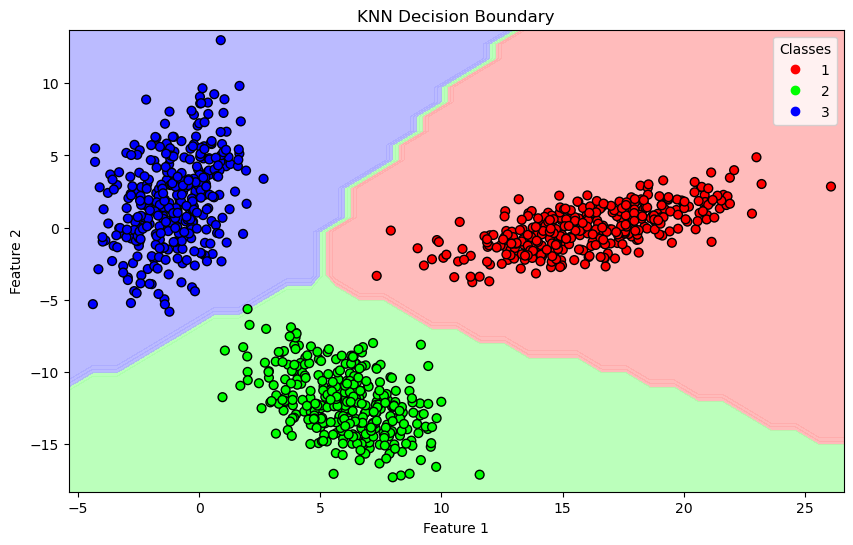

In [25]:
rt=ref_temp(k=9)
rt.fit(X,y)
rt.plot_decision_boundary(X,y)

In [26]:
final_pred=pd.DataFrame(x,columns=['x1','x2'])
final_pred['y_cap']=rt.predict(x)
final_pred

,x1,x2,y_cap
0,14.236000,-0.42192,1
1,15.517000,-0.45230,1
2,8.562100,-1.54380,1
3,13.156000,-0.55674,1
4,16.515000,0.81528,1
...,...,...,...
445,-0.089535,0.27791,3
446,0.641320,9.12650,3
447,-0.684390,-2.17840,3
448,-4.344000,4.98280,3


In [27]:
f=final_pred[['x1','x2']].values
y_hat=final_pred['y_cap'].values

In [28]:
import accuracy
acc=accuracy.accuracy(y_true,y_hat)
acc.confusion_matrix()

array([[  0,   0,   0,   0],
       [  0, 150,   0,   0],
       [  0,   0, 150,   0],
       [  0,   0,   0, 150]])

In [29]:
acc.accu_percent()

100.0

In [30]:
acc.precision()

Precision for class 1 is
1.0
Precision for class 2 is
1.0
Precision for class 3 is
1.0


[1.0, 1.0, 1.0]

In [31]:
acc.recall()

Recall for class1 is 
1.0
Recall for class2 is 
1.0
Recall for class3 is 
1.0


[1.0, 1.0, 1.0]

In [32]:
acc.f_score()

Precision for class 1 is
1.0
Precision for class 2 is
1.0
Precision for class 3 is
1.0
Recall for class1 is 
1.0
Recall for class2 is 
1.0
Recall for class3 is 
1.0
F-score for class 1 is 1.0
F-score for class 2 is 1.0
F-score for class 3 is 1.0


[1.0, 1.0, 1.0]